In [70]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Name_resolver
import tqdm as tq

In [71]:
def get_ncbi_clean_og2gene_for_species(
    species_1, og2genes_only_cococonet, ncbi_mapping
):

    species_1_name = Name_resolver.species_name_resolver(
        species_1, desired_type="common"
    )

    first_species_ortho_groups = og2genes_only_cococonet.loc[
        og2genes_only_cococonet["Species"] == species_1
    ]
    shared_orthogroups = first_species_ortho_groups["Orthogroup"].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(
        shared_orthogroups, desc="inner_loop", position=0, leave=False
    ):
        species_1_genes = (
            first_species_ortho_groups["Gene"]
            .loc[first_species_ortho_groups["Orthogroup"] == orthogroup]
            .to_list()
        )
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(
            columns=[f"{species_1_name} OrthoGene"], data=all_gene_combos
        )
        current_orthogroup_pd["Orthogroup"] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(
        right=ncbi_mapping[["Orthodb Gene", "Symbol"]],
        right_on="Orthodb Gene",
        left_on=f"{species_1_name} OrthoGene",
    )
    ncbi_added_once_clean = ncbi_added_once.drop(columns="Orthodb Gene")
    return ncbi_added_once_clean

In [72]:
og_groups = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol_updated_poplar.csv"
)
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,67026at3193,15368_0:000000,15368,3193.0,15368_0:000000,LOC100829170
1,7376at3193,15368_0:000001,15368,3193.0,15368_0:000001,LOC100840094
2,325723at3193,15368_0:000002,15368,3193.0,15368_0:000002,LOC100841678
3,117946at3193,15368_0:000003,15368,3193.0,15368_0:000003,LOC100844153
4,658893at3193,15368_0:000004,15368,3193.0,15368_0:000004,LOC100841477
...,...,...,...,...,...,...
543381,68168at3193,4577_0:0085a4,4577,3193.0,4577_0:0085a4,ZemaCp159
543382,868182at3193,4577_0:0085a5,4577,3193.0,4577_0:0085a5,rps19
543383,125785at3193,4577_0:0085a6,4577,3193.0,4577_0:0085a6,ZemaCp081
543384,866429at3193,4577_0:0085a7,4577,3193.0,4577_0:0085a7,petD


In [73]:
# og_groups = pd.read_csv(
#     "/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv"
# )
# og_groups

In [74]:
og_groups.loc[og_groups['Species'] == 3694]

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
69259,886815at3193,3694_0:000000,3694,3193.0,3694_0:000000,LOC7478672
69260,672493at3193,3694_0:000001,3694,3193.0,3694_0:000001,LOC7467060
69261,68793at3193,3694_0:000002,3694,3193.0,3694_0:000002,LOC7490712
69262,868336at3193,3694_0:000003,3694,3193.0,3694_0:000003,LOC18094411
69263,82261at3193,3694_0:000004,3694,3193.0,3694_0:000004,LOC7485683
...,...,...,...,...,...,...
97751,867634at3193,3694_0:007b69,3694,3193.0,3694_0:007b69,ndhC
97752,283564at3193,3694_0:007b6a,3694,3193.0,3694_0:007b6a,ndhB
97753,866726at3193,3694_0:007b6b,3694,3193.0,3694_0:007b6b,ndhH
97754,547686at3193,3694_0:007b6c,3694,3193.0,3694_0:007b6c,psbE


In [75]:
# ncbi_mapping = pd.read_csv(
#     "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv"
# )

In [76]:
ncbi_mapping

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,67026at3193,15368_0:000000,15368,3193.0,15368_0:000000,LOC100829170
1,7376at3193,15368_0:000001,15368,3193.0,15368_0:000001,LOC100840094
2,325723at3193,15368_0:000002,15368,3193.0,15368_0:000002,LOC100841678
3,117946at3193,15368_0:000003,15368,3193.0,15368_0:000003,LOC100844153
4,658893at3193,15368_0:000004,15368,3193.0,15368_0:000004,LOC100841477
...,...,...,...,...,...,...
543381,68168at3193,4577_0:0085a4,4577,3193.0,4577_0:0085a4,ZemaCp159
543382,868182at3193,4577_0:0085a5,4577,3193.0,4577_0:0085a5,rps19
543383,125785at3193,4577_0:0085a6,4577,3193.0,4577_0:0085a6,ZemaCp081
543384,866429at3193,4577_0:0085a7,4577,3193.0,4577_0:0085a7,petD


In [77]:
ncbi_mapping = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol_updated_poplar.csv')

In [78]:
ncbi_mapping

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,67026at3193,15368_0:000000,15368,3193.0,15368_0:000000,LOC100829170
1,7376at3193,15368_0:000001,15368,3193.0,15368_0:000001,LOC100840094
2,325723at3193,15368_0:000002,15368,3193.0,15368_0:000002,LOC100841678
3,117946at3193,15368_0:000003,15368,3193.0,15368_0:000003,LOC100844153
4,658893at3193,15368_0:000004,15368,3193.0,15368_0:000004,LOC100841477
...,...,...,...,...,...,...
543381,68168at3193,4577_0:0085a4,4577,3193.0,4577_0:0085a4,ZemaCp159
543382,868182at3193,4577_0:0085a5,4577,3193.0,4577_0:0085a5,rps19
543383,125785at3193,4577_0:0085a6,4577,3193.0,4577_0:0085a6,ZemaCp081
543384,866429at3193,4577_0:0085a7,4577,3193.0,4577_0:0085a7,petD


In [79]:
soybean_og = get_ncbi_clean_og2gene_for_species(
    3847  , og_groups, ncbi_mapping=ncbi_mapping
)

In [80]:
populus_og = get_ncbi_clean_og2gene_for_species(
    3694 , og_groups, ncbi_mapping=ncbi_mapping
)

In [83]:
soybean_og.tail(110)

,soybean OrthoGene,Orthogroup,Symbol
44414,3847_0:00b70e,866624at3193,psbB
44415,3847_0:00b70f,110878at3193,rpl23
44416,3847_0:00b737,110878at3193,rpl23
44417,3847_0:00b710,873378at3193,psbM
44418,3847_0:00b711,752729at3193,rbcL
...,...,...,...
44519,3847_0:00b78b,898071at3193,orf105a
44520,3847_0:00b78e,125256at3193,matR
44521,3847_0:00b78f,892295at3193,orf136a
44522,3847_0:00b791,417238at3193,nad9


In [84]:
populus_og

,poplar OrthoGene,Orthogroup,Symbol
0,3694_0:000000,886815at3193,LOC7478672
1,3694_0:0041e9,886815at3193,LOC7478753
2,3694_0:000001,672493at3193,LOC7467060
3,3694_0:001904,672493at3193,LOC7497871
4,3694_0:000002,68793at3193,LOC7490712
...,...,...,...
28184,3694_0:007b68,866808at3193,psbA
28185,3694_0:007b69,867634at3193,ndhC
28186,3694_0:007b6b,866726at3193,ndhH
28187,3694_0:007b6c,547686at3193,psbE


In [85]:
list_of_non_single_gene_groups_soybean = pd.Series(soybean_og['Orthogroup'].value_counts().loc[soybean_og['Orthogroup'].value_counts() >1])

In [86]:
list_of_non_single_gene_groups_populus = pd.Series(populus_og['Orthogroup'].value_counts().loc[populus_og['Orthogroup'].value_counts() >1])

In [87]:
list_of_non_single_gene_groups_populus

Orthogroup
227973at3193    48
168970at3193    37
125085at3193    35
659104at3193    34
889521at3193    29
                ..
858137at3193     2
138443at3193     2
178788at3193     2
176229at3193     2
884213at3193     2
Name: count, Length: 7076, dtype: int64

In [88]:
list_of_non_single_gene_groups_soybean

Orthogroup
886969at3193    63
889521at3193    54
227973at3193    52
784291at3193    46
866087at3193    43
                ..
28159at3193      2
676631at3193     2
585793at3193     2
583585at3193     2
890017at3193     2
Name: count, Length: 10404, dtype: int64

In [89]:
soybean_og = soybean_og.loc[soybean_og['Orthogroup'].isin(list_of_non_single_gene_groups_soybean.index)]

In [90]:
populus_og = populus_og.loc[populus_og['Orthogroup'].isin(list_of_non_single_gene_groups_populus.index)]

In [91]:
populus_og

,poplar OrthoGene,Orthogroup,Symbol
0,3694_0:000000,886815at3193,LOC7478672
1,3694_0:0041e9,886815at3193,LOC7478753
2,3694_0:000001,672493at3193,LOC7467060
3,3694_0:001904,672493at3193,LOC7497871
4,3694_0:000002,68793at3193,LOC7490712
...,...,...,...
28166,3694_0:007b63,110878at3193,rpl23
28168,3694_0:007b53,870220at3193,rps12
28169,3694_0:007b54,870220at3193,rps12
28176,3694_0:007b5d,692470at3193,ycf2


In [92]:
populus_csv = pd.read_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/populus_reads.csv', index_col = 0)
populus_csv = populus_csv.T
populus_csv

,populus Cold Rep 1,populus Cold Rep 2,populus Cold Rep 3,populus Hot Rep 1,populus Hot Rep 2,populus Hot Rep 3
LOC112326525,228,261,206,156,174,167
LOC7483226,0,0,0,0,0,0
LOC112329039,28,40,34,24,25,27
LOC7457680,0,0,0,0,0,0
LOC7483220,514,640,648,531,606,577
...,...,...,...,...,...,...
Poptr_cp098,0,0,0,0,0,0
Poptr_cpR045,0,0,0,0,0,0
Poptr_cp099,0,0,0,0,0,0
Poptr_cp100,0,0,0,0,0,0


In [93]:
dict_version = populus_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
populus_csv = populus_csv.groupby(by = true_dict).mean()

In [94]:
populus_csv

,populus Cold Rep 1,populus Cold Rep 2,populus Cold Rep 3,populus Hot Rep 1,populus Hot Rep 2,populus Hot Rep 3
10009at3193,10.500000,6.000000,15.50,23.500000,35.500000,25.500000
10092at3193,225.500000,322.500000,268.50,260.500000,267.500000,282.500000
10147at3193,324.500000,339.000000,367.50,334.500000,326.000000,330.000000
10228at3193,570.500000,654.500000,772.50,558.000000,519.000000,577.000000
10525at3193,142.000000,239.500000,251.00,143.500000,117.000000,114.000000
...,...,...,...,...,...,...
9789at3193,302.750000,274.750000,308.25,231.000000,242.500000,235.500000
9836at3193,264.000000,270.500000,314.00,289.500000,254.000000,278.500000
9877at3193,692.500000,789.500000,897.00,880.000000,1285.000000,1341.000000
9919at3193,275.500000,291.000000,352.50,225.500000,259.500000,213.500000


In [95]:
populus_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Cold", "Cold", "Cold", "Hot", "Hot", "Hot"],
    index=[
        "populus Cold Rep 1",
        "populus Cold Rep 2",
        "populus Cold Rep 3",
        "populus Hot Rep 1",
        "populus Hot Rep 2",
        "populus Hot Rep 3",
    ],
)

In [96]:
combined_soybean = pd.read_csv("/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/soybean_reads.csv", index_col = 0)
combined_soybean = combined_soybean.T
combined_soybean


,soybean Hot Rep 1,soybean Hot Rep 2,soybean Hot Rep 3,soybean Cold Rep 1,soybean Cold Rep 2,soybean Cold Rep 3
GLYMA_01G000322,12,16,10,31,19,8
GLYMA_01G000400,156,172,122,558,243,263
GLYMA_01G000600,87,93,84,223,80,117
GLYMA_01G000750,0,0,0,0,0,0
GLYMA_01G000900,129,149,99,334,163,208
...,...,...,...,...,...,...
GLYMA_20G249700,47,70,81,226,103,74
GLYMA_20G249800,902,989,1076,2763,1417,1034
GLYMA_20G249900,24,39,36,44,32,43
GLYMA_20G250000,176,247,173,485,178,224


In [97]:
dict_version = soybean_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
combined_soybean = combined_soybean.groupby(by = true_dict).mean()
combined_soybean

,soybean Hot Rep 1,soybean Hot Rep 2,soybean Hot Rep 3,soybean Cold Rep 1,soybean Cold Rep 2,soybean Cold Rep 3
10009at3193,11.000000,14.333333,13.000000,20.333333,9.333333,13.333333
10092at3193,13.000000,20.000000,14.666667,59.666667,22.666667,22.000000
10147at3193,54.500000,75.250000,42.250000,140.250000,68.000000,65.250000
10228at3193,244.000000,282.000000,201.000000,591.000000,201.000000,243.000000
10488at3193,38.000000,72.000000,30.000000,208.000000,97.000000,101.000000
...,...,...,...,...,...,...
9828at3193,290.000000,301.666667,235.333333,684.000000,350.666667,377.333333
9836at3193,27.500000,37.000000,23.000000,71.500000,25.500000,26.500000
9877at3193,88.000000,115.750000,80.500000,252.250000,112.250000,123.000000
9919at3193,4.500000,21.000000,10.500000,27.000000,21.000000,18.000000


In [98]:
combined_soybean = combined_soybean.T
populus_csv = populus_csv.T

In [99]:
soybean_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Hot","Cold","Cold", "Cold", ],
    index=[
        "soybean Hot Rep 1",
        "soybean Hot Rep 2",
        "soybean Hot Rep 3",
        "soybean Cold Rep 1",
        "soybean Cold Rep 2",
        "soybean Cold Rep 3",
    ],
)

In [100]:
combined_soybean = combined_soybean.round(0)
populus_csv = populus_csv.round(0)

In [101]:
genes_to_keep_populus = populus_csv.columns[populus_csv.sum(axis=0) >= 100]
populus_csv = populus_csv[genes_to_keep_populus]
inference_populus = DefaultInference(n_cpus=30)
dds_populus = DeseqDataSet(
    counts=populus_csv,
    metadata=populus_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_populus,
)
dds_populus.deseq2()
stat_res_populus = DeseqStats(dds_populus, inference=inference_populus)
stat_res_populus.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.47 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 0.46 seconds.

Fitting LFCs...
... done in 0.35 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                baseMean  log2FoldChange     lfcSE      stat    pvalue  \
10009at3193    19.669381        1.493754  0.428254  3.488012  0.000487   
10092at3193   270.123634        0.047081  0.166977  0.281961  0.777974   
10147at3193   335.526005        0.001197  0.117523  0.010188  0.991872   
10228at3193   603.576550       -0.205620  0.119945 -1.714278  0.086478   
10525at3193   165.711234       -0.682993  0.227607 -3.000753  0.002693   
...                  ...             ...       ...       ...       ...   
9789at3193    264.605584       -0.264797  0.135442 -1.955062  0.050576   
9836at3193    277.145772        0.017085  0.133631  0.127853  0.898265   
9877at3193    978.400784        0.619882  0.172812  3.587032  0.000334   
9919at3193    267.535702       -0.329935  0.139675 -2.362164  0.018169   
9942at3193   1116.891368        0.167189  0.108108  1.546503  0.121983   

                 padj  
10009at3193  0.002144  
10092at3

... done in 0.63 seconds.



In [102]:
genes_to_keep = combined_soybean.columns[combined_soybean.sum(axis=0) >= 100]
combined_soybean = combined_soybean[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds_soybean = DeseqDataSet(
    counts=combined_soybean,
    metadata=soybean_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds_soybean.deseq2()
stat_res_soybean = DeseqStats(dds_soybean, inference=inference)
stat_res_soybean.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.47 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 0.53 seconds.

Fitting LFCs...
... done in 0.38 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
10092at3193   22.502080       -0.413890  0.371788 -1.113243  0.265604   
10147at3193   68.932967       -0.015256  0.245894 -0.062041  0.950530   
10228at3193  272.773793        0.214799  0.186410  1.152294  0.249200   
10488at3193   79.316090       -0.890832  0.272759 -3.266004  0.001091   
10582at3193   30.857010       -0.641621  0.362143 -1.771731  0.076439   
...                 ...             ...       ...       ...       ...   
9828at3193   351.248933       -0.128416  0.169502 -0.757610  0.448684   
9836at3193    32.645742        0.220009  0.317083  0.693852  0.487775   
9877at3193   119.059401       -0.106873  0.204422 -0.522805  0.601110   
9919at3193    15.982399       -0.347541  0.504140 -0.689373  0.490588   
9942at3193   129.921249       -0.101787  0.203684 -0.499732  0.617264   

                 padj  
10092at3193  0.626270  
10147at3193  0.98671

... done in 0.34 seconds.



In [103]:
full_results_soybean = stat_res_soybean.results_df
full_results_soybean
full_populus_results = stat_res_populus.results_df

In [104]:
full_results_soybean.to_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/soybean_ortho_trimmed_out_2_gene_families.csv')
full_populus_results.to_csv('/data/passala/Module_paper_data/Populus_vs_glycine_drought/Ortho_vs_gene_files/populus_ortho_trimmed_out_2_gene_families.csv')


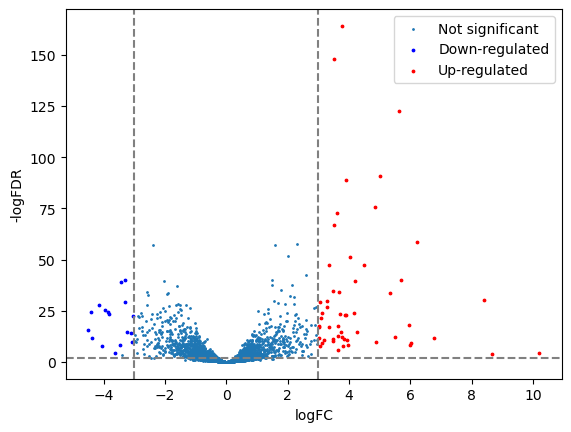

In [105]:
plt.scatter(
    x=full_populus_results["log2FoldChange"],
    y=full_populus_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down_populus = full_populus_results[
    (full_populus_results["log2FoldChange"] <= -3)
    & (full_populus_results["padj"] <= 0.0001)
]
up_populus = full_populus_results[
    (full_populus_results["log2FoldChange"] >= 3) & (full_populus_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down_populus["log2FoldChange"],
    y=down_populus["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up_populus["log2FoldChange"],
    y=up_populus["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [106]:
up_populus

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
114828at3193,4947.467159,3.497004,0.133067,26.280104,3.238016e-152,9.794998e-149
115309at3193,420.723860,3.341511,0.372605,8.967979,3.020049e-19,1.286711e-17
115479at3193,24.451350,4.870933,0.719492,6.769965,1.288134e-11,2.164072e-10
115601at3193,33.383296,3.069482,0.511810,5.997312,2.006105e-09,2.451906e-08
119384at3193,836.069281,6.202651,0.372961,16.630830,4.167836e-62,2.801712e-59
122345at3193,66.043922,3.488970,0.478977,7.284204,3.235749e-13,7.016588e-12
128540at3193,505.963172,4.498695,0.300740,14.958769,1.365275e-50,5.506609e-48
129387at3193,951.798365,3.505304,0.197551,17.743786,1.925167e-70,1.455907e-67
133256at3193,19.435500,3.795188,0.617536,6.145694,7.961486e-10,1.024830e-08
139199at3193,36.282975,8.657788,1.981354,4.369633,1.244554e-05,8.140054e-05


In [68]:
plt.scatter(
    x=full_results["log2FoldChange"],
    y=full_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down = full_results[
    (full_results["log2FoldChange"] <= -3) & (full_results["padj"] <= 0.0001)
]
up = full_results[
    (full_results["log2FoldChange"] >= 3) & (full_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down["log2FoldChange"],
    y=down["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up["log2FoldChange"],
    y=up["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

NameError: name 'full_results' is not defined

In [ ]:
up